In [10]:
import os
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)
os.environ["PYTHONWARNINGS"] = "ignore::UserWarning"
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=UserWarning)

In [11]:
def smoothLoss(pred_y = None, y = None, x = None):
    if x != None:
        return 0.2 * (1 - x) + 0.8 * (1 - 1 / (np.exp(-400 * x + 20) + 1))
    else:
        x = np.abs(pred_y, y) / y
        return 0.2 * (1 - x) + 0.8 * (1 - 1 / (np.exp(-400 * x + 20) + 1))

def discLoss(pred_y = None, y = None, x = None):
    if x != None:
        mape = np.mean(x)
        acc = len(x[x <= 0.05])
        return 0.2 * (1 - mape) + 0.8 * acc
    else:
        dy = np.abs(pred_y - y) / y
        mape = np.sum(dy) / len(y)
        acc = len(dy[dy <= 0.05]) / len(y)
        return 0.2 * (1 - mape) + 0.8 * acc

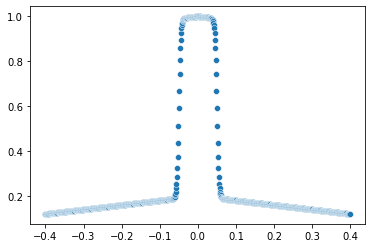

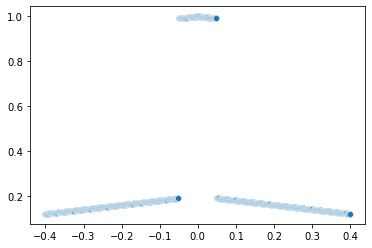

<Figure size 432x288 with 0 Axes>

In [12]:
x_list = []
y_list_smooth = []
y_list_discre = []
for x in np.arange(-0.4, 0.4, 0.001):
    x_list.append(x)
    y_list_smooth.append(smoothLoss(x = np.abs(x)))
    y_list_discre.append(discLoss(x = np.abs(x)))
    
sns.scatterplot(x_list, y_list_smooth)
plt.show()
plt.cla()
plt.clf()
sns.scatterplot(x_list, y_list_discre)
plt.show()
plt.cla()
plt.clf()